In [164]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [169]:
TARGET_LEN=96
KIND = "multivariate"  # Change to "univariate" if needed

df = pd.read_json(f"results/{KIND}/mse.json")


datasets = df.columns.tolist()
contexts = df.index.tolist()

new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [170]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [171]:
merged_df

,national_illness,exchange_rate,etth2,etth1,ettm1,ettm2,weather
model,,,,,,,
crossformer,4.620512,0.208055,0.202919,0.418674,0.335024,0.114182,0.151382
itransformer,4.454974,0.104001,0.193235,0.451870,0.393322,0.125643,0.182524
moment,3.146579,0.113956,0.186127,0.432969,0.305599,0.167615,0.155547
patchtst,4.308956,0.100141,0.184064,0.464822,0.316673,0.112074,0.146234
samformer,4.767649,0.267107,0.242677,0.645324,0.593240,0.151901,0.275646
timemixer,2.225464,0.088767,0.204340,0.472327,0.426868,0.118572,0.173027
vaformer,1.806522,0.093310,0.185844,0.433353,0.410962,0.116427,0.156679


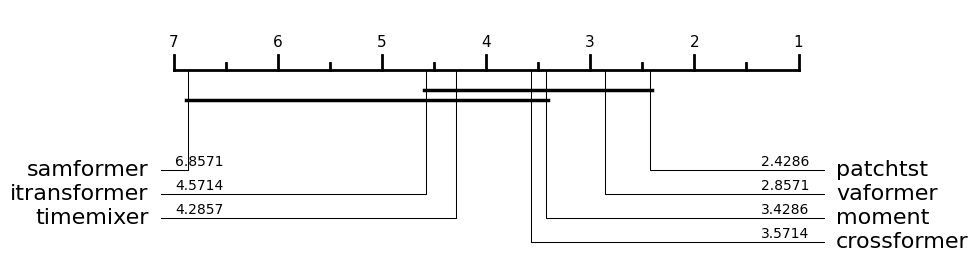

In [172]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  